### Spam Detection using Naive Bayes

Using Multinomial Naive Bayes a simple Spam Detection model was implemented.Using Data Analysis and Experimentation MNB was choosed to maximize Precision and Accuracy.

Dataset Used: SMS Spam Collection Dataset by UCI

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. 


Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.


### Importing Libraries 

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Observation 

Columns 'Unnamed:2' 'Unnamed:3' 'Unnamed:4' are see  to filled with NaN values. If most of the column consists of maximum NaN values, this signals to an imbalanced dataset. So, After checking their counts, they may be dropped from further analysis



In [6]:
df.shape

(5572, 5)

### Our Model Building Process

#### Data Cleaning


#### EDA




#### Text Preprocessing

#### Model Building


#### Evaluation





### Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### Columns 2,3,4 cotains maximum no. of null values. so they will be dropped


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### v1, v2 as column names doesn't make sense. so, they wil be renamed

In [10]:
df.rename(columns={'v1':'Label','v2':'text'},inplace = True)

In [11]:
df.head()

,Label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Labels has values as ham and spam, in model building it is easier to work with 0,1 so, they will be encoded to similar format

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['Label'] = encoder.fit_transform(df['Label'])

In [14]:
df.head()

,Label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

Label    0
text     0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.head()

,Label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.shape

(5169, 2)

### Exploratory Data Analysis


In [20]:
df['Label'].value_counts()

0    4516
1     653
Name: Label, dtype: int64

#### Observation:
Data samples contains more ham values that spam. so it is heavily imabalanced 

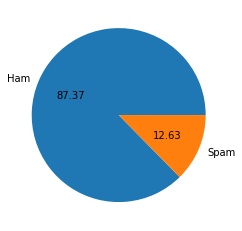

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['Label'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')
plt.show()

In [22]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/samip/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['character_count'] = df['text'].apply(len)
df['word_count']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df['sentence_count'] =df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,Label,text,character_count,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df.describe()

,Label,character_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [28]:
import seaborn as sns

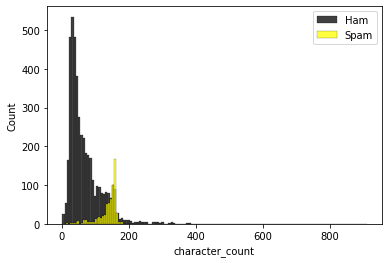

In [29]:
sns.histplot(df[df['Label']==0]['character_count'],color='black')
sns.histplot(df[df['Label']==1]['character_count'],color='yellow')
plt.legend(['Ham','Spam'])
plt.show()

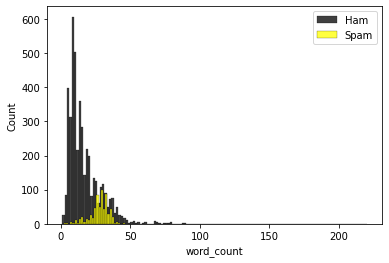

In [30]:
sns.histplot(df[df['Label']==0]['word_count'],color='black')
sns.histplot(df[df['Label']==1]['word_count'],color='yellow')
plt.legend(['Ham','Spam'])
plt.show()

#### Observation:
Spam values tends to have smaller no. of word,character,sentence count

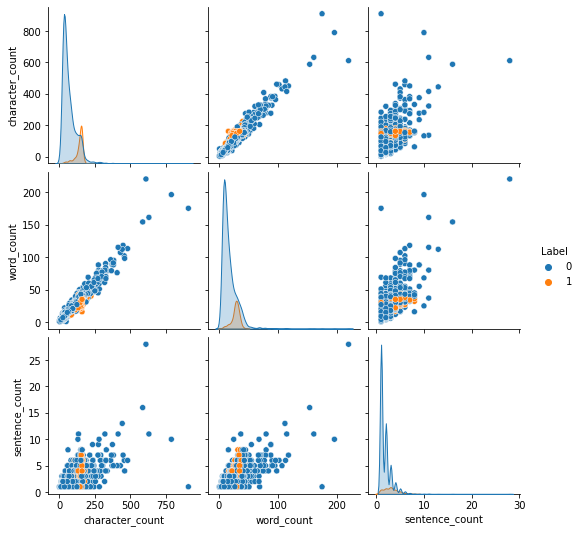

In [31]:
sns.pairplot(df,hue='Label')

### Observation:

Data Samples has some outliers.

Since we are working with textual data, Naive Bayes is certainly a great algorithm to work with as it produces better results altogether in this context.


<AxesSubplot:>

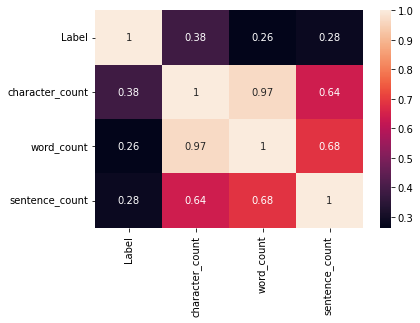

In [32]:
sns.heatmap(df.corr(),annot=True)

### Observation:

From the above correlation heat map we can observe the fact that character count is well correlated with Lables.

Character,Word,Sentence counts are themselves correlated heavily with each other. so, it is better to choose only one from them, ideally character_count.

### Text Preprocessing 

Tasks: 
    lower cases,
    managing stop words
    ,Vectorization
    ,stem words
    

In [33]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [34]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

from nltk.corpus import stopwords
import string

In [35]:
df['transformed_text'] = df['text'].apply(transform_text)

In [36]:


df.head()



,Label,text,character_count,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
spam_corpus=[]
for msg in df[df['Label']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [38]:
len(spam_corpus)

9939

/home/samip/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


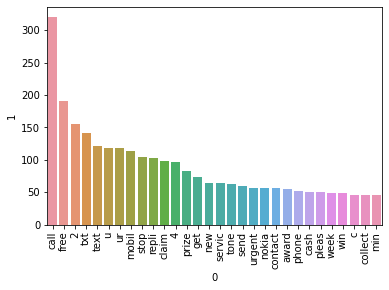

In [39]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [40]:
ham_corpus=[]
for msg in df[df['Label']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [41]:
len(ham_corpus)

35394

/home/samip/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


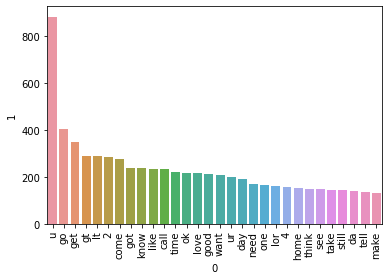

In [42]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#### Model Building

In [43]:


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)



### Tfidf Vectorizer worked best in the experiment

In [44]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [45]:
X.shape

(5169, 3000)

In [46]:
y = df['Label'].values

In [47]:
y

array([0, 0, 1, ..., 0, 0, 0])

#### Splitting the data 

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix

In [49]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb_cv_score = cross_val_score(gnb, X, y, cv=10, scoring="roc_auc")
mnb_cv_score = cross_val_score(mnb, X, y, cv=10, scoring="roc_auc")
bnb_cv_score = cross_val_score(bnb, X, y, cv=10, scoring="roc_auc")

In [67]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)


In [68]:
print("------Confusion Matrix------")
print(confusion_matrix(y_test, y_pred1))
print('\n')
print("------Classification Report------")
print(classification_report(y_test, y_pred1))
print('\n')
print("------All AUC Scores------")
print(gnb_cv_score)
print('\n')
print("------ Mean AUC Score------")
print("Mean AUC Score - GNB: ", gnb_cv_score.mean())

------Confusion Matrix------
[[801 112]
 [ 21 100]]


------Classification Report------
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       913
           1       0.47      0.83      0.60       121

    accuracy                           0.87      1034
   macro avg       0.72      0.85      0.76      1034
weighted avg       0.92      0.87      0.89      1034



------All AUC Scores------
[0.873145   0.86545269 0.8094452  0.84901293 0.86223622 0.83915929
 0.8597561  0.8902439  0.84922395 0.85974757]


------ Mean AUC Score------
Mean AUC Score - GNB:  0.8557422843722218


In [70]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)


In [71]:
print("------Confusion Matrix------")
print(confusion_matrix(y_test, y_pred2))
print('\n')
print("------Classification Report------")
print(classification_report(y_test, y_pred2))
print('\n')
print("------All AUC Scores------")
print(mnb_cv_score)
print('\n')
print("------ Mean AUC Score------")
print("Mean AUC Score - MNB: ", mnb_cv_score.mean())

------Confusion Matrix------
[[912   1]
 [ 30  91]]


------Classification Report------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       913
           1       0.99      0.75      0.85       121

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.97      1034



------All AUC Scores------
[0.98801906 0.99002723 0.98087134 0.99223962 0.98757658 0.96698434
 0.96203722 0.98703218 0.98074985 0.99310933]


------ Mean AUC Score------
Mean AUC Score - MNB:  0.9828646762194628


In [72]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)


In [73]:
print("------Confusion Matrix------")
print(confusion_matrix(y_test, y_pred3))
print('\n')
print("------Classification Report------")
print(classification_report(y_test, y_pred3))
print('\n')
print("------All AUC Scores------")
print(bnb_cv_score)
print('\n')
print("------ Mean AUC Score------")
print("Mean AUC Score - BNB: ", bnb_cv_score.mean())

------Confusion Matrix------
[[910   3]
 [ 16 105]]


------Classification Report------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       913
           1       0.97      0.87      0.92       121

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



------All AUC Scores------
[0.9890742  0.99108237 0.99380531 0.99908101 0.99642614 0.97450647
 0.96966337 0.99183632 0.99254183 0.99655466]


------ Mean AUC Score------
Mean AUC Score - BNB:  0.9894571682266677


### Observation:

MNB has great Precision and Accuarcy 